<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

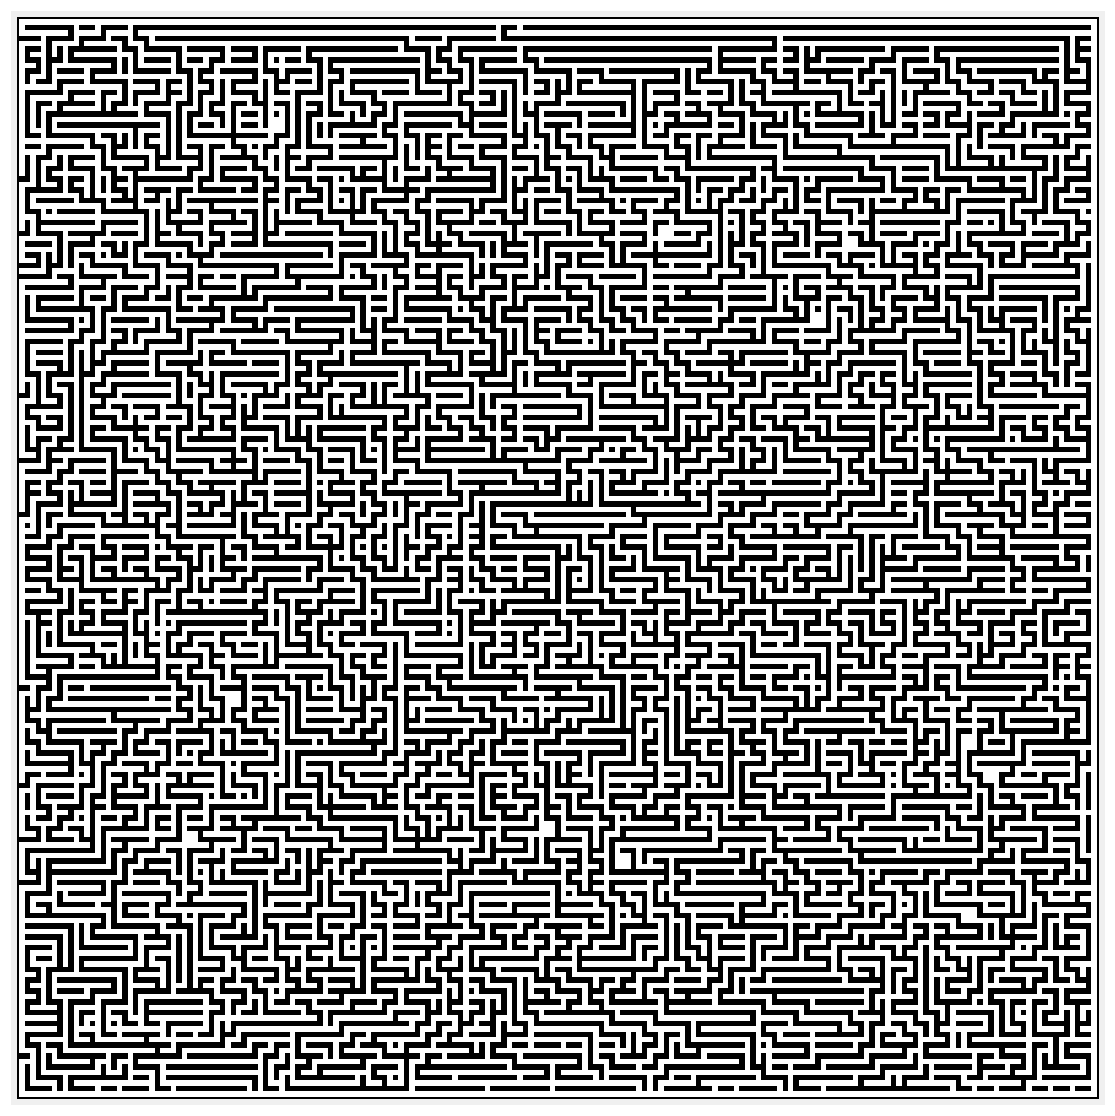

In [47]:
import numpy
from numpy.random import randint as rand
import matplotlib.pyplot as pyplot

def maze(width=100, height=100, complexity=1, density=1):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1]))) # number of components
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2))) # size of components
    # Build actual maze
    Z = numpy.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2 # pick a random position
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z

pyplot.figure(figsize=(10, 10))
pyplot.imshow(maze(200, 200), cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

In [7]:
!pwd

/Users/maartenk/Documents/git


In [8]:
!ls

AccuracyAndUnbalance.ipynb
Auto_Summary_Legal.ipynb
CltAndLlnIllustration.ipynb
CodeAlongRegressionStacker.ipynb
CodeAlongRegressionStackerSolution.ipynb
CookBooks
DsMasterClass
FrequencySummarizer.py
GeoPandasNetherlands.ipynb
ImputKnn.xls
MarkdownCheatsheet.ipynb
McMcInShort.ipynb
MonteCarlo3 2.ipynb
MonteCarlo3 3.ipynb
MonteCarlo3 4.ipynb
MonteCarlo3.ipynb
MonteCarloSurface.ipynb
MonteCarloSurface2.ipynb
MyDataScienceCookBook3.ipynb
MyDataScienceCookBookPart1.ipynb
MyDataScienceCookBookPart2.ipynb
MyDataScienceCookBookPart3.ipynb
MyPythonCheatSheet.ipynb
NlpSnippitsWIP.ipynb
NoteOnStratification.ipynb
Plotting.ipynb
Projects
README.md
RegressionWorkflowCookBook2.ipynb
ReidQuote.jpg
ShapesRoadshow-Copy1.ipynb
ShapesRoadshow.ipynb
ShapesRoadshow.ipynb copy
SkLearnOverview.ipynb
TextSummary
TimeSeriesWindMill.ipynb
Unsupervised
Untitled.ipynb
Untitled.ipynb copy
Untitled1.ipynb
Untitled2 2.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4 2.ipynb
Untitled4 3.ipynb
Untitled4 4.ipynb
Websc

In [46]:
# df_maze.py
import random

# Create a maze using the depth-first algorithm described at                    
# https://scipython.com/blog/making-a-maze/                                     
# Christian Hill, April 2017.

class Cell:
    """A cell in the maze.

    A maze "Cell" is a point in the grid which may be surrounded by walls to
    the north, east, south or west.

    """

    # A wall separates a pair of cells in the N-S or W-E directions.
    wall_pairs = {'N': 'S', 'S': 'N', 'E': 'W', 'W': 'E'}

    def __init__(self, x, y):
        """Initialize the cell at (x,y). At first it is surrounded by walls."""

        self.x, self.y = x, y
        self.walls = {'N': True, 'S': True, 'E': True, 'W': True}

    def has_all_walls(self):
        """Does this cell still have all its walls?"""

        return all(self.walls.values())

    def knock_down_wall(self, other, wall):
        """Knock down the wall between cells self and other."""

        self.walls[wall] = False
        other.walls[Cell.wall_pairs[wall]] = False

class Maze:
    """A Maze, represented as a grid of cells."""

    def __init__(self, nx, ny, ix=0, iy=0):
        """Initialize the maze grid.
        The maze consists of nx x ny cells and will be constructed starting
        at the cell indexed at (ix, iy).

        """

        self.nx, self.ny = nx, ny
        self.ix, self.iy = ix, iy
        self.maze_map = [[Cell(x, y) for y in range(ny)] for x in range(nx)]

    def cell_at(self, x, y):
        """Return the Cell object at (x,y)."""

        return self.maze_map[x][y]

    def __str__(self):
        """Return a (crude) string representation of the maze."""

        maze_rows = ['-' * nx*2]
        for y in range(ny):
            maze_row = ['|']
            for x in range(nx):
                if self.maze_map[x][y].walls['E']:
                    maze_row.append(' |')
                else:
                    maze_row.append('  ')
            maze_rows.append(''.join(maze_row))
            maze_row = ['|']
            for x in range(nx):
                if self.maze_map[x][y].walls['S']:
                    maze_row.append('-+')
                else:
                    maze_row.append(' +')
            maze_rows.append(''.join(maze_row))
        return '\n'.join(maze_rows)

    def write_svg(self, filename):
        """Write an SVG image of the maze to filename."""

        aspect_ratio = self.nx / self.ny
        # Pad the maze all around by this amount.
        padding = 10
        # Height and width of the maze image (excluding padding), in pixels
        height = 500
        width = int(height * aspect_ratio)
        # Scaling factors mapping maze coordinates to image coordinates
        scy, scx = height / ny, width / nx

        def write_wall(f, x1, y1, x2, y2):
            """Write a single wall to the SVG image file handle f."""

            print('<line x1="{}" y1="{}" x2="{}" y2="{}"/>'
                                .format(x1, y1, x2, y2), file=f)

        # Write the SVG image file for maze
        with open(filename, 'w') as f:
            # SVG preamble and styles.
            print('<?xml version="1.0" encoding="utf-8"?>', file=f)
            print('<svg xmlns="http://www.w3.org/2000/svg"', file=f)
            print('    xmlns:xlink="http://www.w3.org/1999/xlink"', file=f)
            print('    width="{:d}" height="{:d}" viewBox="{} {} {} {}">'
                    .format(width+2*padding, height+2*padding,
                        -padding, -padding, width+2*padding, height+2*padding),
                  file=f)
            print('<defs>\n<style type="text/css"><![CDATA[', file=f)
            print('line {', file=f)
            print('    stroke: #000000;\n    stroke-linecap: square;', file=f)
            print('    stroke-width: 5;\n}', file=f)
            print(']]></style>\n</defs>', file=f)
            # Draw the "South" and "East" walls of each cell, if present (these
            # are the "North" and "West" walls of a neighbouring cell in
            # general, of course).
            for x in range(nx):
                for y in range(ny):
                    if maze.cell_at(x,y).walls['S']:
                        x1, y1, x2, y2 = x*scx, (y+1)*scy, (x+1)*scx, (y+1)*scy
                        write_wall(f, x1, y1, x2, y2)
                    if maze.cell_at(x,y).walls['E']:
                        x1, y1, x2, y2 = (x+1)*scx, y*scy, (x+1)*scx, (y+1)*scy
                        write_wall(f, x1, y1, x2, y2)
            # Draw the North and West maze border, which won't have been drawn
            # by the procedure above. 
            print('<line x1="0" y1="0" x2="{}" y2="0"/>'.format(width), file=f)
            print('<line x1="0" y1="0" x2="0" y2="{}"/>'.format(height),file=f)
            print('</svg>', file=f)

    def find_valid_neighbours(self, cell):
        """Return a list of unvisited neighbours to cell."""

        delta = [('W', (-1,0)),
                 ('E', (1,0)),
                 ('S', (0,1)),
                 ('N', (0,-1))]
        neighbours = []
        for direction, (dx,dy) in delta:
            x2, y2 = cell.x + dx, cell.y + dy
            if (0 <= x2 < nx) and (0 <= y2 < ny):
                neighbour = maze.cell_at(x2, y2)
                if neighbour.has_all_walls():
                    neighbours.append((direction, neighbour))
        return neighbours

    def make_maze(self):
        # Total number of cells.
        n = self.nx * self.ny
        cell_stack = []
        current_cell = self.cell_at(ix, iy)
        # Total number of visited cells during maze construction.
        nv = 1

        while nv < n:
            neighbours = self.find_valid_neighbours(current_cell)

            if not neighbours:
                # We've reached a dead end: backtrack.
                current_cell = cell_stack.pop()
                continue

            # Choose a random neighbouring cell and move to it.
            direction, next_cell = random.choice(neighbours)
            current_cell.knock_down_wall(next_cell, direction)
            cell_stack.append(current_cell)
            current_cell = next_cell
            nv += 1

# Maze dimensions (ncols, nrows)
nx, ny = 30, 30
# Maze entry position
ix, iy = 1, 1

maze = Maze(nx, ny, ix, iy)
maze.make_maze()

print(maze)
# maze.write_svg('maze.svg')

------------------------------------------------------------
|         |       |             |     |     |       | |     |
| +-+ +-+ +-+ +-+-+ +-+ +-+-+-+ + + + + + +-+ +-+ + + + +-+ +
| | |   |   |     |   |       | | | | | |       | | | | | | |
|-+ +-+ +-+ + +-+ +-+ +-+-+-+ + +-+ + + +-+-+-+-+ + + + + + +
|   |   |   | | |     |   |   |     | | |         | |     | |
| +-+ +-+ +-+ + +-+-+-+ + + +-+-+-+-+ +-+ +-+-+-+-+ + +-+-+ +
| |   |   |       |     | |         |     |       | | |   | |
| + +-+ +-+-+-+-+ +-+-+ + +-+-+-+-+ +-+-+-+-+ +-+ + +-+ + + +
| | | | |       |     | |   | |     |       | |   |     |   |
| + + + +-+ +-+ +-+-+ + +-+ + + + +-+ +-+-+ + + +-+ +-+-+-+-+
|   | | |   | | |   |   | | | | | |     |   | |     |       |
|-+-+ + + +-+ + + + +-+-+ + + + +-+ +-+-+ +-+ +-+-+-+ +-+-+ +
|   |   | |   | | |       |   | |   |     |   |       |   | |
|-+ + +-+ + +-+ +-+-+-+ + +-+ + + +-+ +-+-+-+-+ +-+-+-+-+ + +
|   |     |   | |       | |   |   | |   |     | |   |     | |
| + +-+-+

In [45]:
maze

ValueError: not enough values to unpack (expected 2, got 1)

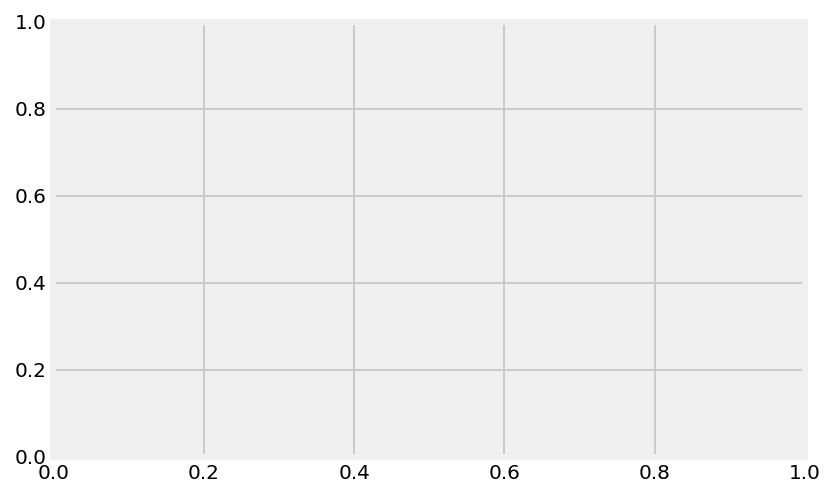

In [35]:
import matplotlib.pyplot as plt

# with open("maze.txt", "w") as output:
#     output.dump(maze)
# # #open and read the file after the appending:
# # f = open("demofile3.txt", "r")
# # print(f.read())

# # maze = []
# with open("maze.txt", 'r') as file:
for line in maze:
    line = line.rstrip()
    row = []
    for c in line:
        if c == ' ':
            row.append(1) # spaces are 1s
        else:
            row.append(0) # walls are 0s
    maze.append(row)

plt.pcolormesh(maze)
plt.axes().set_aspect('equal') #set the x and y axes to the same scale
plt.xticks([]) # remove the tick marks by setting to an empty list
plt.yticks([]) # remove the tick marks by setting to an empty list
plt.axes().invert_yaxis() #invert the y-axis so the first row of data is at the top
plt.show()